<a href="https://colab.research.google.com/github/TadResearchAccount/Autono-Lab/blob/main/Day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip -q install gymnasium[classic_control] matplotlib numpy

In [2]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

In [3]:
env = gym.make("Pendulum-v1", g=10)
dt = env.unwrapped.dt

In [4]:
def run_pid(Kp, Ki, Kd, steps=200):
  ob, _ = env.reset(seed=0)
  I=0; prev_e=0; angles=[]
  for _ in range(steps):
    th = np.arctan2(ob[1], ob[0])
    e = -th; I += e*dt; D = (e-prev_e)/dt; prev_e =e
    u = Kp*e + Ki*I + Kd*D
    ob, _, _, _, _ = env.step([u])
    angles.append(th)
  iae = np.sum(np.abs(angles))*dt
  return iae, np.array(angles)

In [5]:
# Grid search
grid = np.linspace(0.5, 5.0, 6)
best = (1e9, None, None)
for Kp in grid:
  for Ki in [0.0, 0.2, 0.4]:
    for Kd in [0.0, 0.4, 0.8]:
      iae, ang = run_pid(Kp, Ki, Kd)
      if iae < best[0]:
        best = (iae, (Kp, Ki, Kd), ang)

iae, (Kp, Ki, Kd), best_traj = best
print(f"Best PID: Kp={Kp:.2f}, Ki={Ki:.2f}, Kd={Kd:.2f}, IAE={iae:.3f}")

Best PID: Kp=5.00, Ki=0.00, Kd=0.80, IAE=6.096


saved tune.png


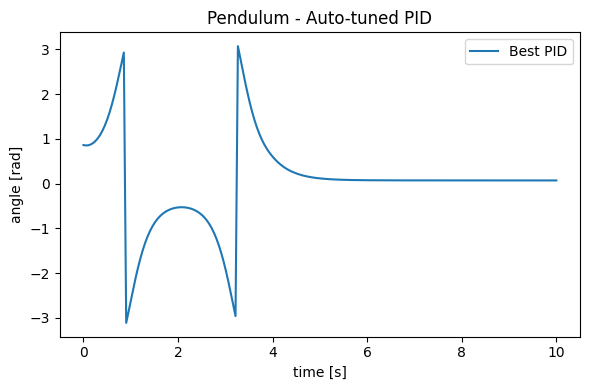

In [6]:
# Plot
t = np.linspace(0, len(best_traj)*dt, len(best_traj))
plt.figure(figsize=(6,4))
plt.plot(t, best_traj, label="Best PID")
plt.xlabel("time [s]"); plt.ylabel("angle [rad]")
plt.title("Pendulum - Auto-tuned PID")
plt.legend(); plt.tight_layout()
plt.savefig("tune.png", dpi=150)
print("saved tune.png")